<a href="https://colab.research.google.com/github/kimhwidam/Maching_Learning/blob/main/ML_2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML 2일차 - 타이타닉 생존자 예측

데이터 출처 - https://pinkwink.kr/1119?category=580892

In [2]:
!pip install plotly_express

In [4]:
# 데이터 읽기
import pandas as pd

titanic = pd.read_excel('/content/991E034F5ACF3E552C.xls')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


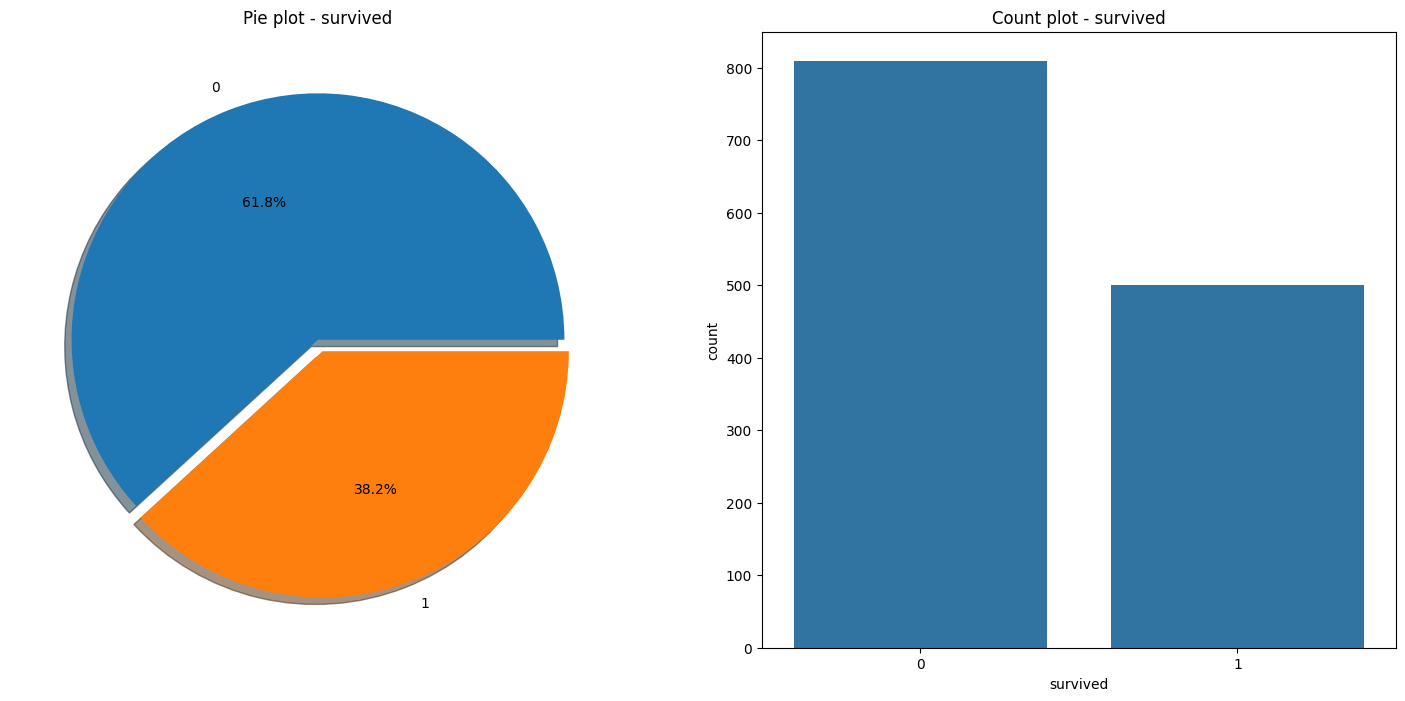

In [9]:
# 생존 현황 시각화 -> 생존률 38.2%, 생존자는 약 500명
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(18, 8))
titanic['survived'].value_counts().plot.pie(ax=ax[0],autopct='%1.1f%%', shadow=True, explode=[0, 0.05])
ax[0].set_title('Pie plot - survived')
ax[0].set_ylabel('')

sns.countplot(x='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - survived')

plt.show()

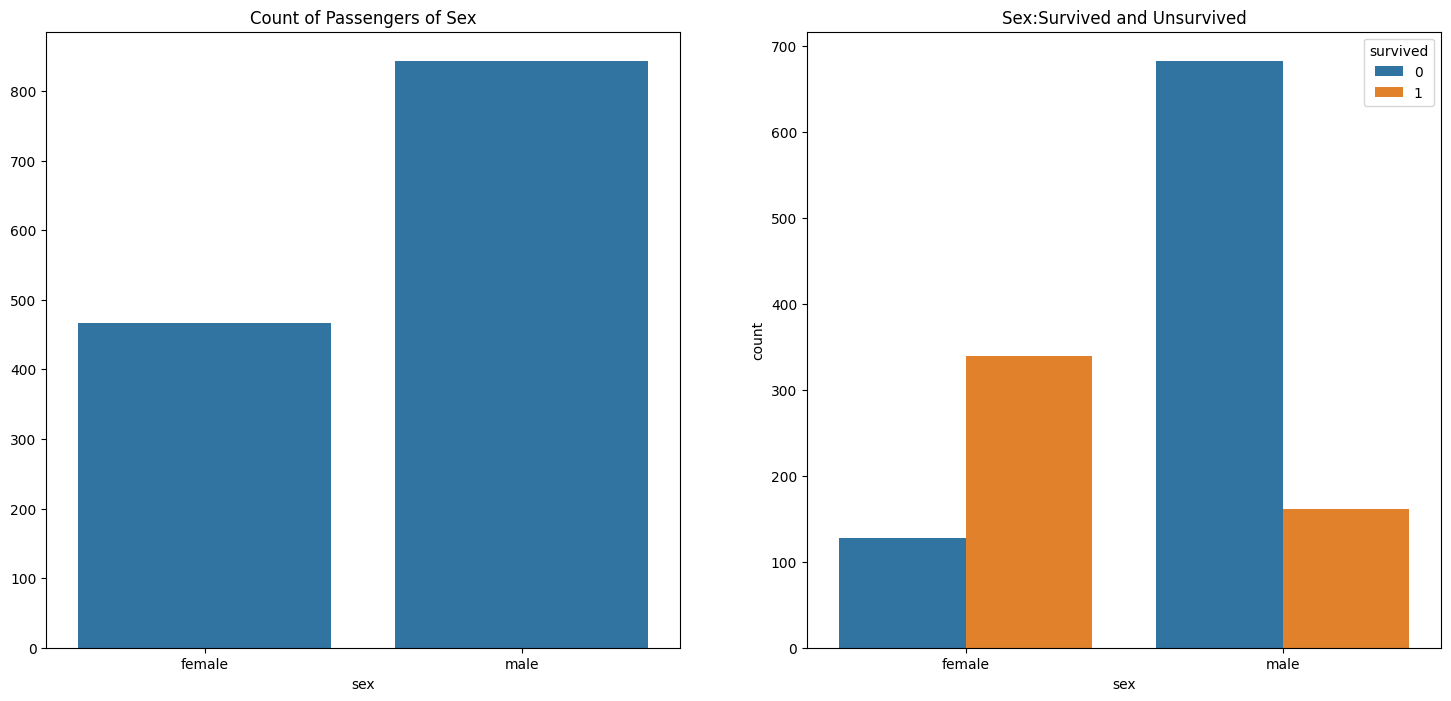

In [12]:
# 성별에 따른 생존률 시각화
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', data=titanic, hue='survived', ax=ax[1])
ax[1].set_title('Sex:Survived and Unsurvived')

plt.show()

## 남성이 더 많이 탑승했고, 남성의 생존 가능성이 더 낮았음

In [16]:
# 경제력 대비 생존률
# crosstab : 2번째 컬럼을 구분지어 주고, 인덱스에 1번째 컬럼을 담아 줌
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


## 1등실의 생존 가능성이 제일 높음

여성도 생존을 많이 했고, 1등실에도 생존을 많이 했다. -> 그럼 1등실에 여성이 많았나?

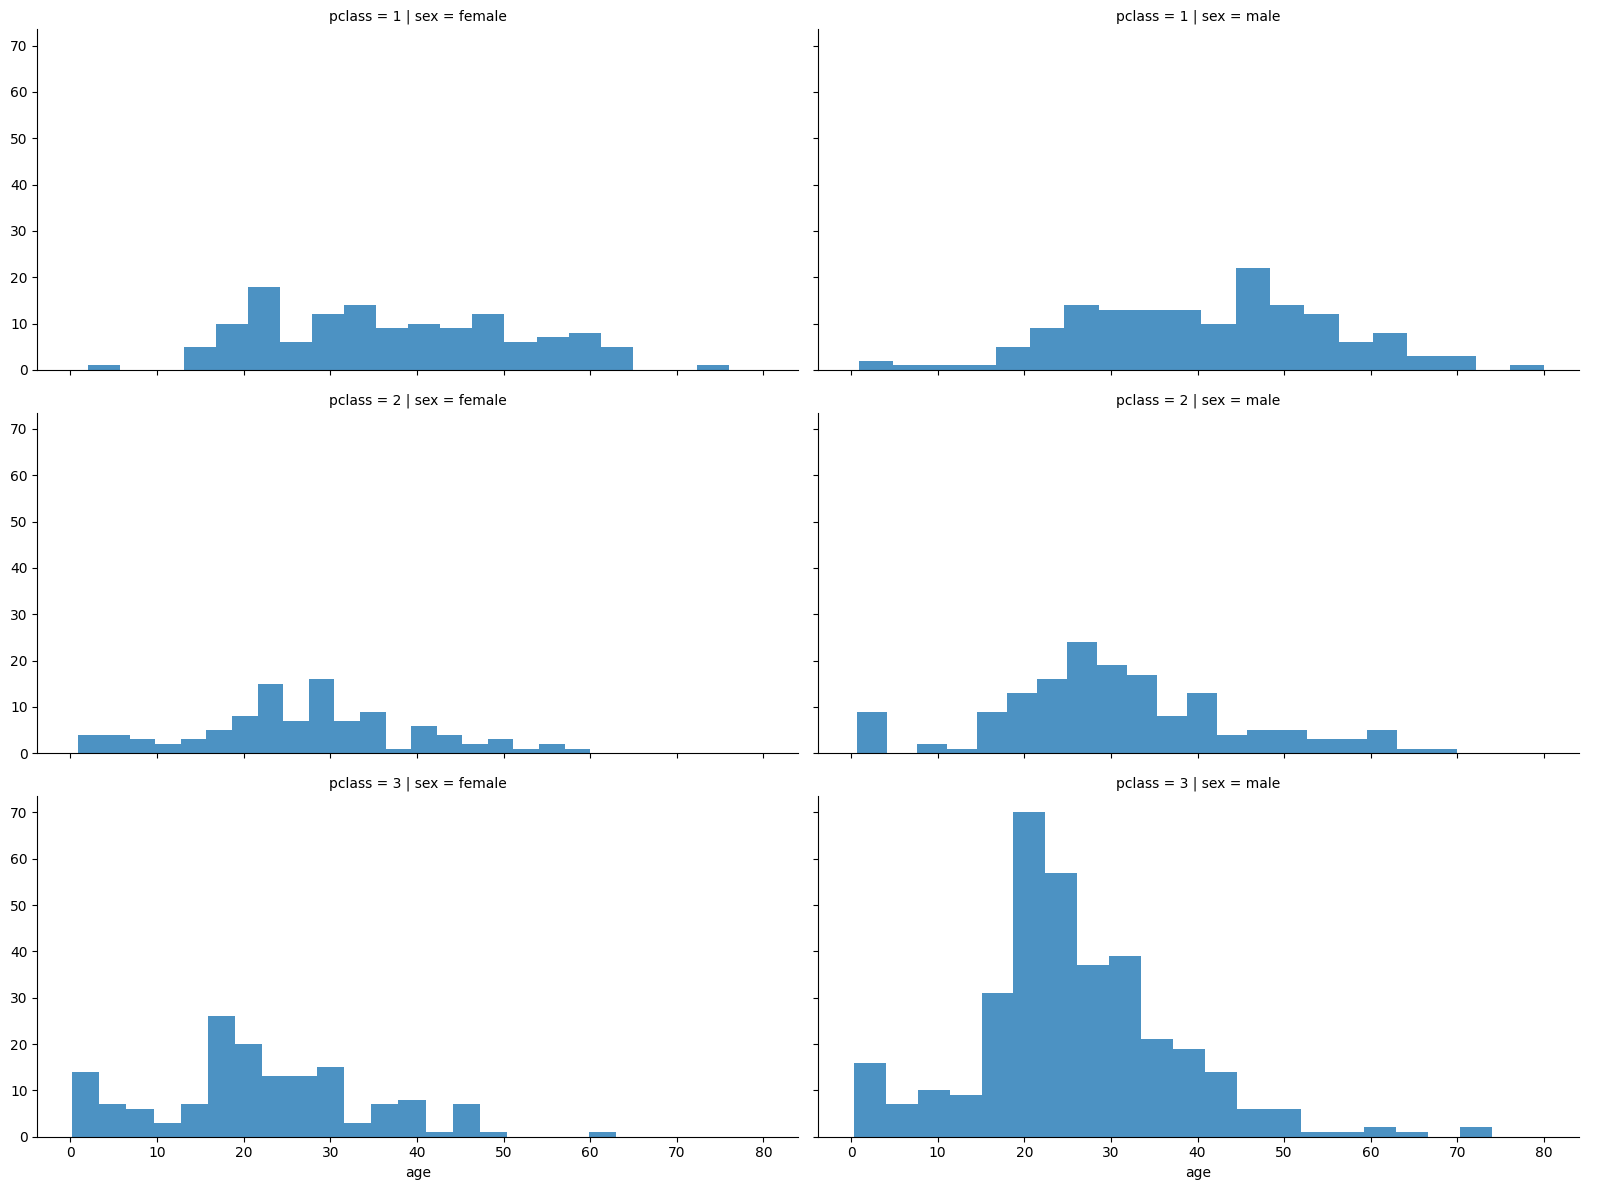

In [19]:
# 선실 등급별 성별 현황
# FacetGrid(변수 지정, 행, 컬럼, 높이, 넓이)
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
# (hist을 넣어라, 나이를 기준으로, 투명도는 0.8로, 수평축의 간격)
grid.map(plt.hist, 'age', alpha=.8, bins=20)
grid.add_legend()

## 3등실에는 남성이 많았음, 특히 20대 남성

In [20]:
# 나이별 승객 현황
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

 ## 아이들과 20~30대가 많았음

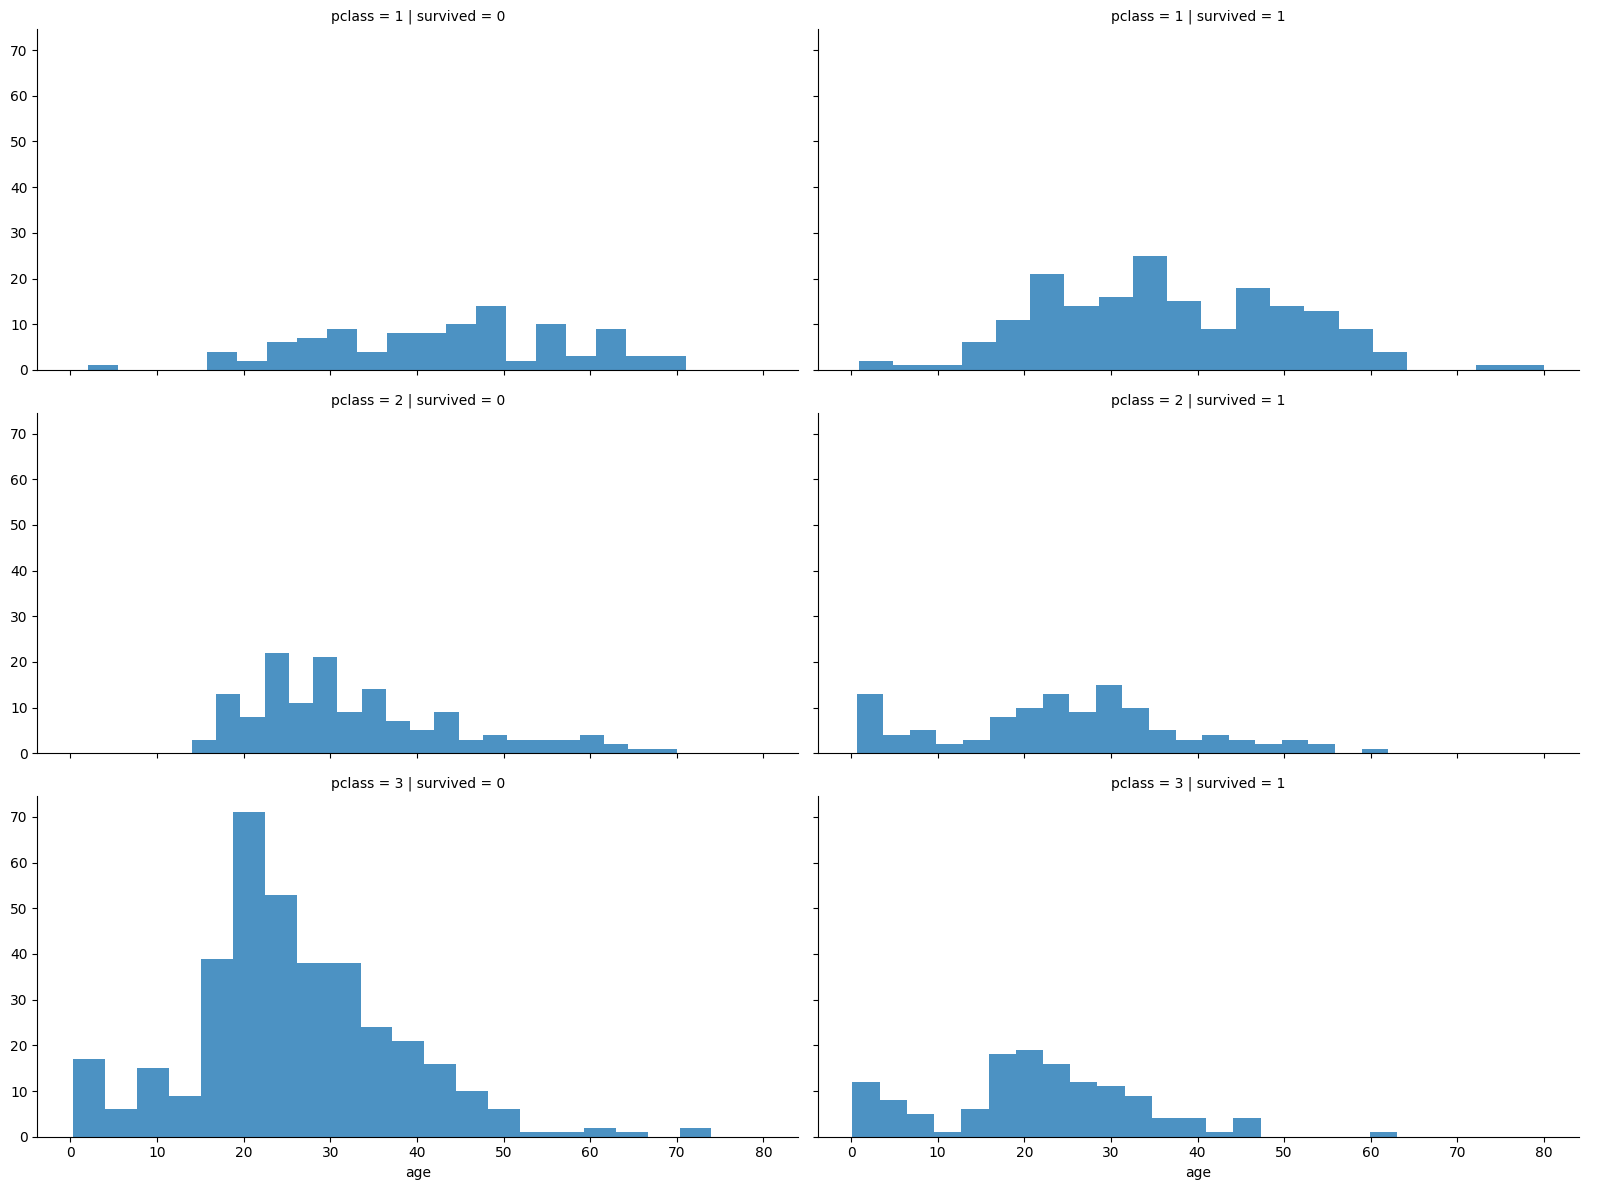

In [21]:
# 등실별 생존률을 연령별로 관찰
grid = sns.FacetGrid(titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.8, bins=20)
grid.add_legend()

 ## 선실 등급이 높으면 생존률이 높음

In [23]:
# 나이를 단계별로 지정
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0, 7, 15, 30, 60, 100],
       include_lowest=True,
       labels=['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


<Axes: xlabel='sex', ylabel='survived'>

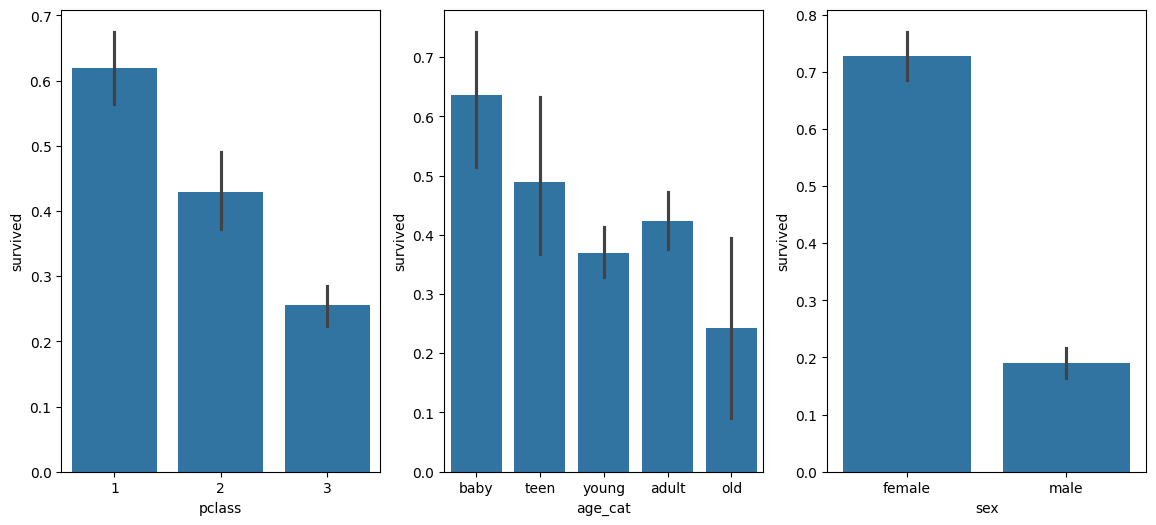

In [25]:
# 선실, 나이 카테고리, 성별에 대해 생존률 시각화
plt.figure(figsize=(14, 6))

plt.subplot(131)
sns.barplot(x='pclass', y='survived', data=titanic)

plt.subplot(132)
sns.barplot(x='age_cat', y='survived', data=titanic)

plt.subplot(133)
sns.barplot(x='sex', y='survived', data=titanic)

## 어리고, 여성이고, 1등실일수록 생존하기 유리....?

<ipython-input-29-4839bf0c49fd>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-29-4839bf0c49fd>:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-29-4839bf0c49fd>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use 

Text(0.5, 1.0, 'male')

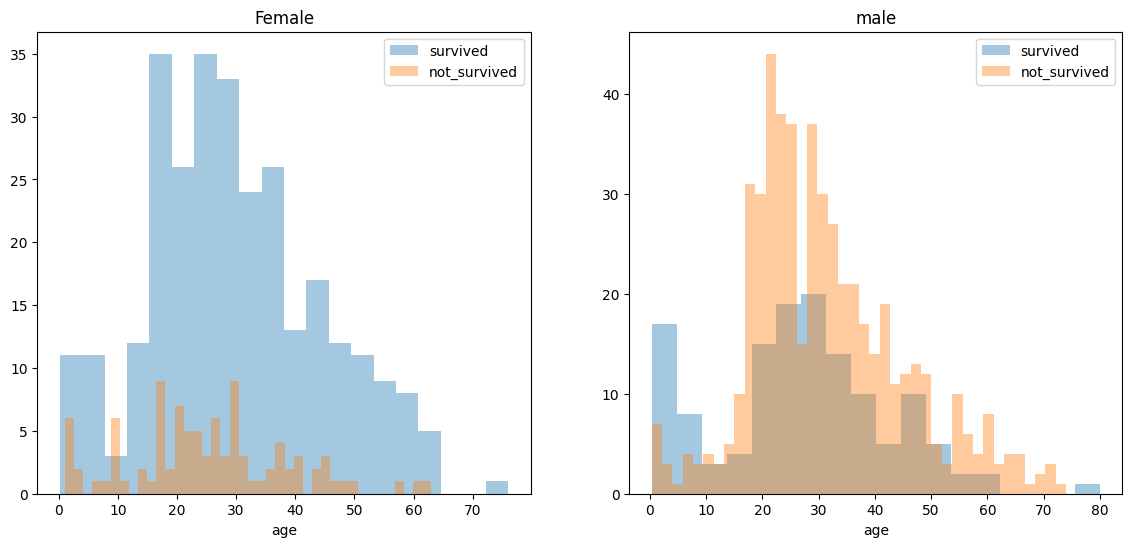

In [29]:
# 남/여 나이별 생존 현황
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

sns.distplot(women[women['survived']==1]['age'], bins=20,
                 label='survived', ax=axes[0], kde=False)

sns.distplot(women[women['survived']==0]['age'], bins=40,
                 label='not_survived', ax=axes[0], kde=False)
axes[0].legend()
axes[0].set_title('Female')

sns.distplot(men[men['survived']==1]['age'], bins=18,
                 label='survived', ax=axes[1], kde=False)

sns.distplot(men[men['survived']==0]['age'], bins=40,
                 label='not_survived', ax=axes[1], kde=False)
axes[1].legend()
axes[1].set_title('male')

## 여성의 생존율이 높고, 특히 20~30대의 생존률이 제일 낮음

In [30]:
# 탑승객의 이름에서 신분을 알 수 있음
for idx, dataset in titanic.iterrows():
    print(dataset['name'])

Allen, Miss. Elisabeth Walton
Allison, Master. Hudson Trevor
Allison, Miss. Helen Loraine
Allison, Mr. Hudson Joshua Creighton
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Anderson, Mr. Harry
Andrews, Miss. Kornelia Theodosia
Andrews, Mr. Thomas Jr
Appleton, Mrs. Edward Dale (Charlotte Lamson)
Artagaveytia, Mr. Ramon
Astor, Col. John Jacob
Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Aubart, Mme. Leontine Pauline
Barber, Miss. Ellen "Nellie"
Barkworth, Mr. Algernon Henry Wilson
Baumann, Mr. John D
Baxter, Mr. Quigg Edmond
Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Bazzani, Miss. Albina
Beattie, Mr. Thomson
Beckwith, Mr. Richard Leonard
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
Behr, Mr. Karl Howell
Bidois, Miss. Rosalie
Bird, Miss. Ellen
Birnbaum, Mr. Jakob
Bishop, Mr. Dickinson H
Bishop, Mrs. Dickinson H (Helen Walton)
Bissette, Miss. Amelia
Bjornstrom-Steffansson, Mr. Mauritz Hakan
Blackwell, Mr. Stephen Weart
Blank, Mr. Henry
Bonnell, Miss. Caroline
Bonnell, Miss

In [32]:
# 정규식을 이용해서 문장 사이의 신분에 대한 정보 얻기
import re

title = []
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [33]:
# 성별별로 본 귀족
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [35]:
# 사회적 신분 정리
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Dr', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [36]:
# 사회적 신분에 대한 생존률
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,0.636364
4,Rare_m,0.443038


## 머신러닝 모델 구축 - 생존자 예측

In [37]:
# 결측치와 숫자로 변환해야 하는 컬럼 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


In [38]:
# 머신러닝을 위해 해당 컬럼을 숫자로 변경 - Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
# 변환
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [39]:
# 결측치 제거
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 140.0+ KB


In [42]:
# 이제 특성을 선택하고, 데이터를 나누고 Decision Tree로 모델 구현
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = titanic[['pclass', 'age', 'sibsp', 'parch',
             'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))


0.7655502392344498


## 정확도는 약 76%

## 그럼 디카프리오의 생존률은??

In [43]:
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Decaprio: ', dt.predict_proba(dicaprio)[0, 1])

Decaprio:  0.16728624535315986


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



## 그럼 윈슬릿은?

In [45]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print('winslet: ', dt.predict_proba(winslet)[0, 1])

winslet:  1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

